# Progressive example on how to create a scatter plot with R

I created this notebook to showcase the progressive creation of a scatter plot with R, following the example in the course "Data Analysis with R Programming" by Google.

You can find the course [here](https://www.coursera.org/learn/data-analysis-r/).

## Package installation

The first step is to install the packages needed to create the plot.

This is required only once, so we can use the `if` statement to check if the packages are already installed and skip the installation if they are.

For this example we will use the Palmer Penguins dataset, which is a great dataset for practicing data analysis and visualization.

You can find the dataset [here](https://allisonhorst.github.io/palmerpenguins/articles/intro.html).

Also, we need the `ggplot2` package to create the plot.

When prompted, choose the CRAN mirror closest to you.

In [1]:
if (!require("palmerpenguins")) install.packages("palmerpenguins")
if (!require("ggplot2")) install.packages("ggplot2")

Loading required package: palmerpenguins


Attaching package: ‘palmerpenguins’


The following objects are masked from ‘package:datasets’:

    penguins, penguins_raw


Loading required package: ggplot2



The message that the *objects are masked* is not an error, it is a message from R that the packages have been loaded, founding 2 packages with the same name.

## Lanuch packages

After the installation, we need to launch the packages.

In [32]:
library(ggplot2)
library(palmerpenguins)

We can check the data with the `head` function.

In [33]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


## Draw the plot

Now we can create the plot.

We start by creating a basic plot with the `ggplot` function.

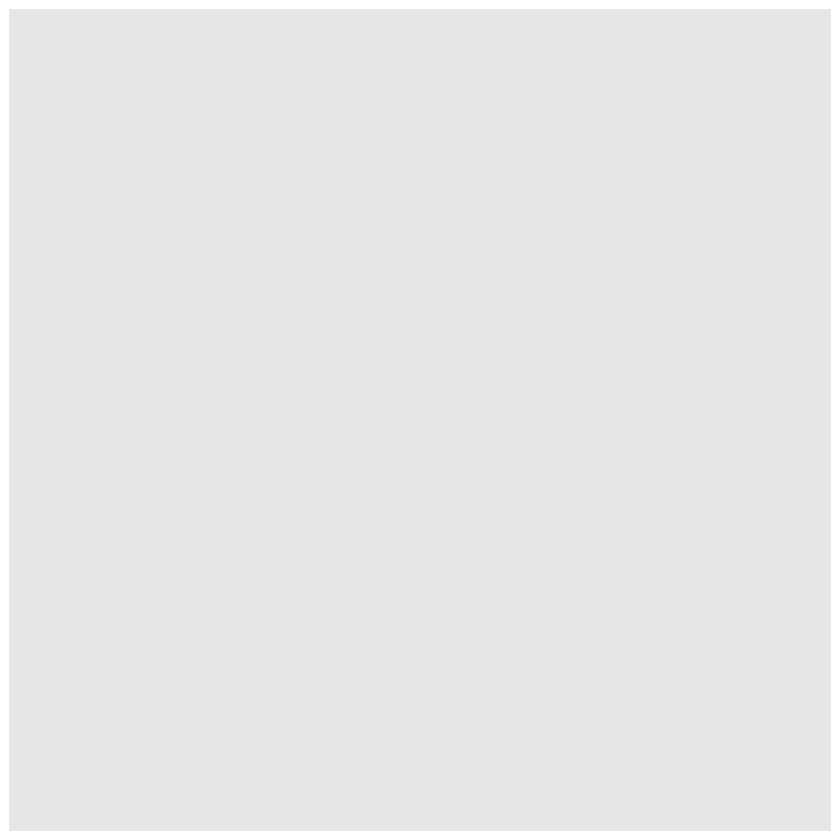

In [34]:
ggplot()

As you can notice, the plot is empty.

We need to tell R what data to use and how to map the variables to the axes.

As we are doing **Data Analytics** we can formulate the *hypothesis* that the flipper length and the body mass are correlated, the more the flipper length, the more the body mass.

The function that map the axes is `aes`, that stands for *aesthetics*.

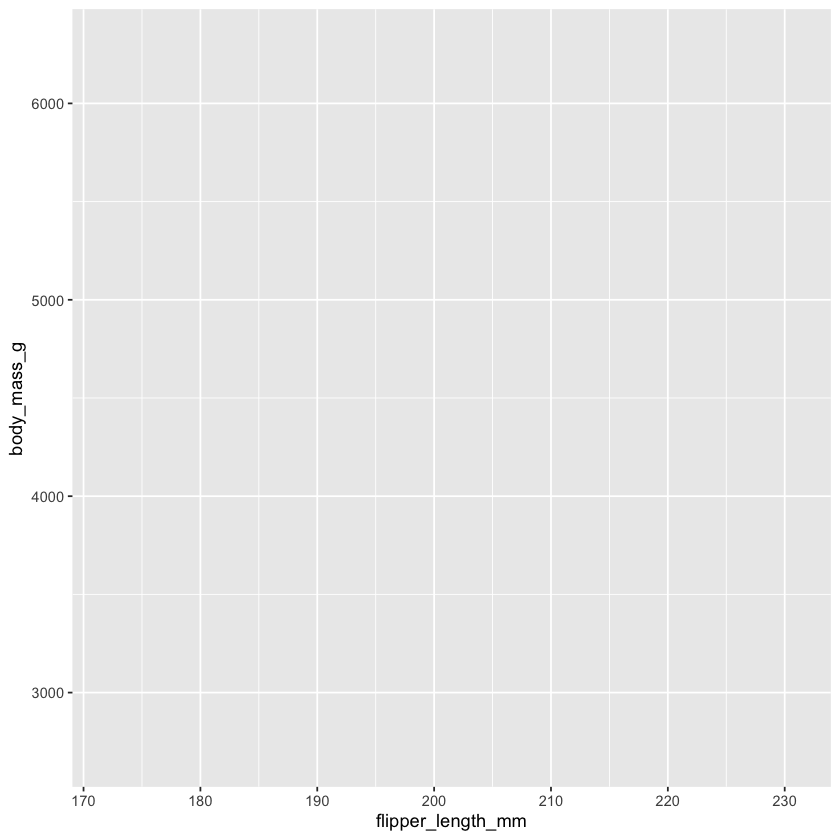

In [37]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g))

Great! We made progress, now we have a base grid and axes, but we need to add the points.

The function that add the points is `geom_point`.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


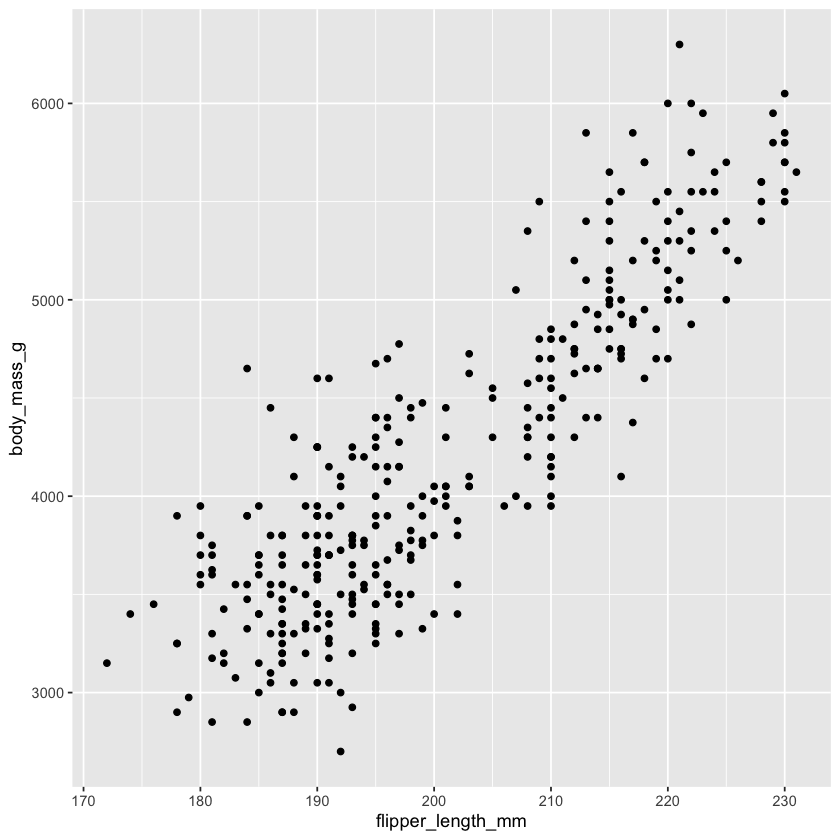

In [39]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point()

Congratulations! You have just created your first scatter plot with R.

And we sort of validated our hypothesis, the more the flipper length, the more the body mass.

However, we can see the warning message:

```
Warning message:
Removed 2 rows containing missing values (geom_point).
```

This is because the dataset has some missing values, that we can remove with the `na.omit` function.

But before doing that, let's see what are the missing values, with the follwing function:

In [44]:
penguins[which(is.na(penguins$flipper_length_mm) | is.na(penguins$body_mass_g)), ]

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Gentoo,Biscoe,NA,NA,NA,NA,NA,2009


Great! Now we can remove the missing values with the `na.omit` function.
penguins <- na.omit(penguins)
Now we can create the plot again.
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point()

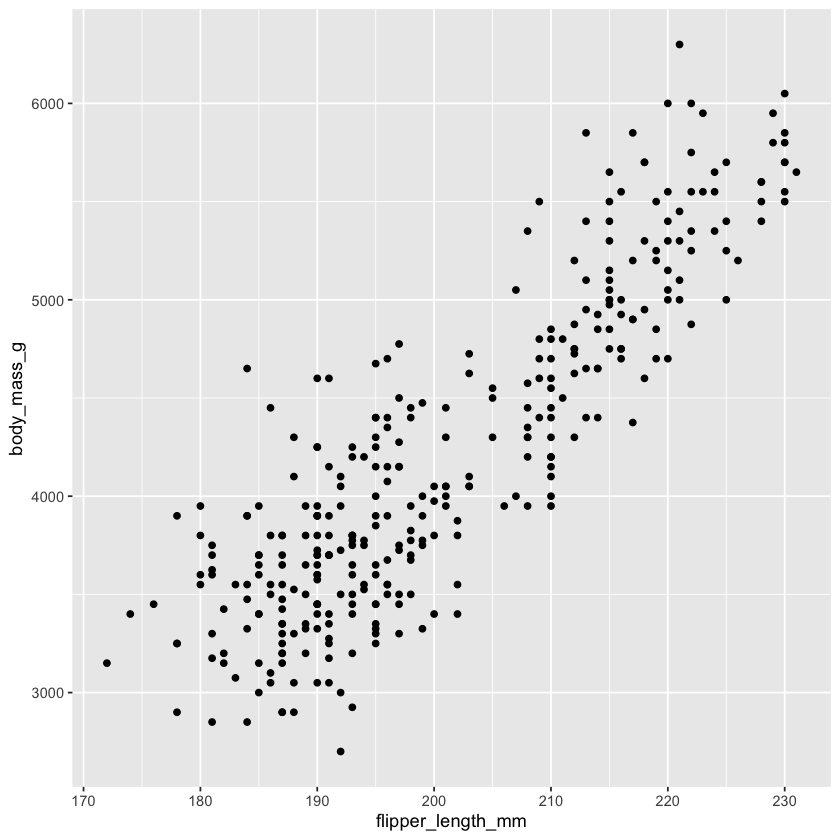

In [45]:
penguins <- na.omit(penguins)
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point()

## Add a regression line

We want to show the relationship between the flipper length and the body mass, so we can add a regression line to the plot.

The function that add the regression line is `geom_smooth`.

We use a linear regression line with the `method = "lm"` argument.

`geom_smooth()` using formula = 'y ~ x'


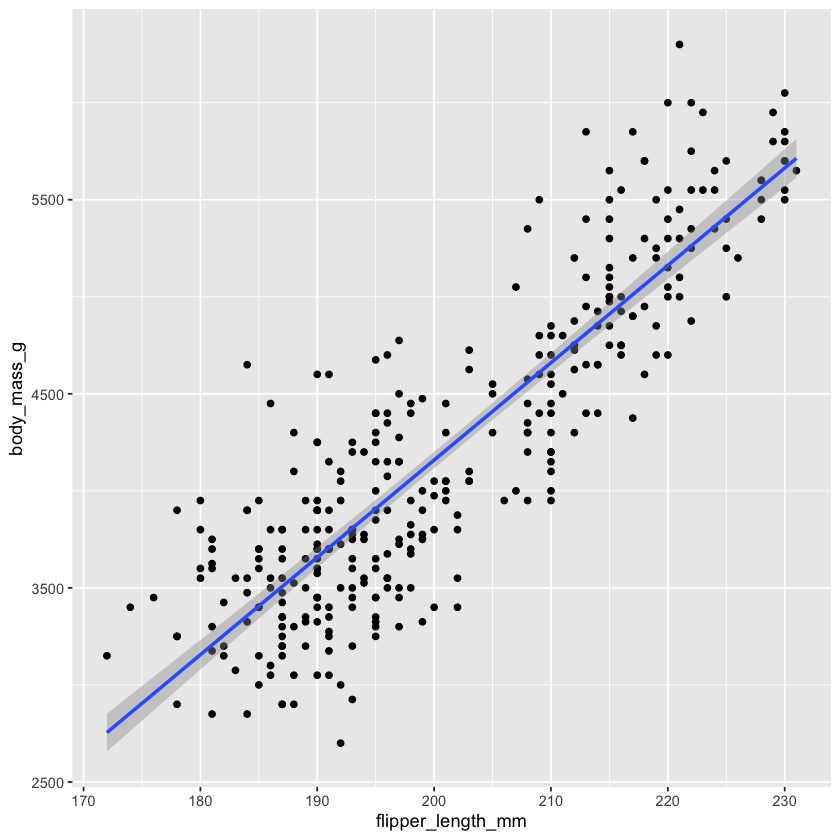

In [48]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point() + geom_smooth(method = "lm")

As you can see, the default regression model is y ~ x. 

We can experiment with other models, like the loess model with the `method = "loess"` argument.

`geom_smooth()` using formula = 'y ~ x'


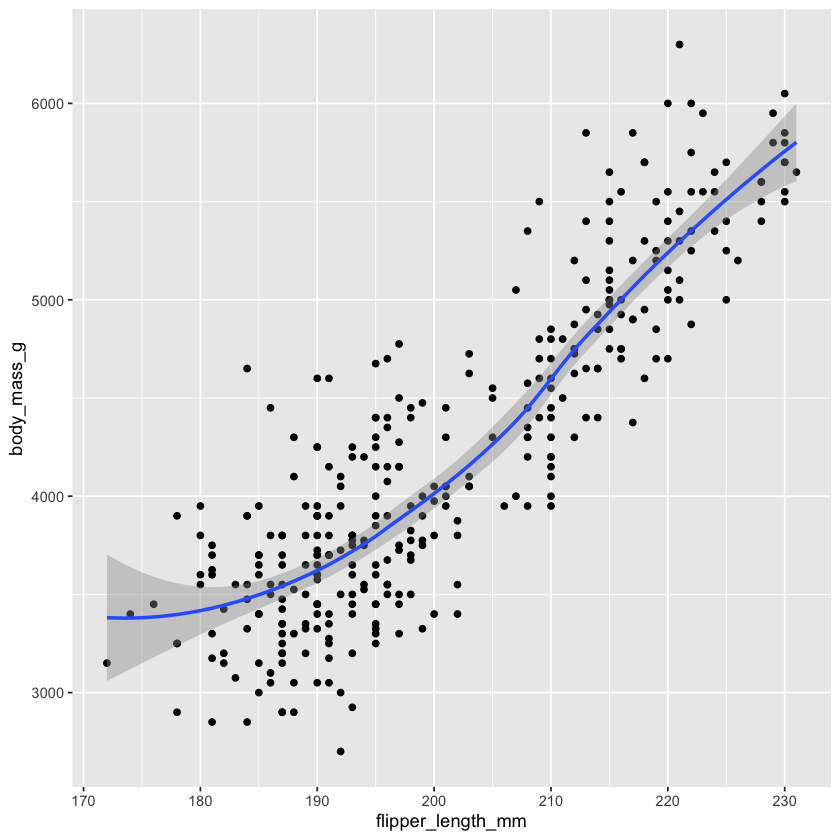

In [49]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point() + geom_smooth(method = "loess")

Or we can use a polynomial regression model with the `method = "lm", formula = y ~ poly(x,2)` argument.

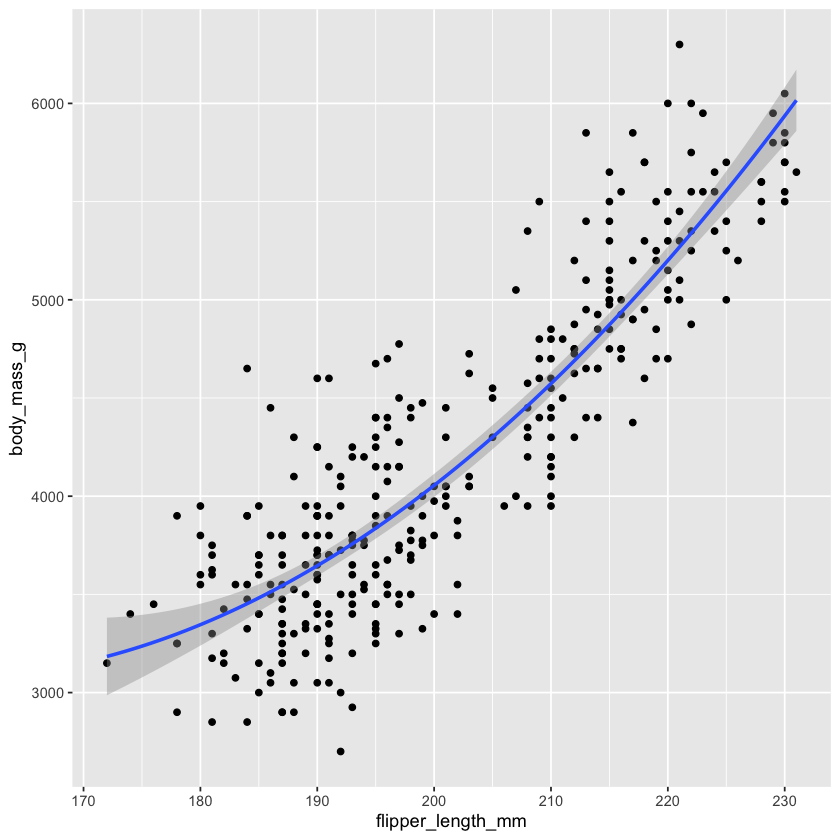

In [52]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point() + geom_smooth(method = "lm", formula = y ~ poly(x,2))

When the formula is specified, you can notice that the standard output does not report it.

## Add some color

We can add some color to the plot to make it more informative.


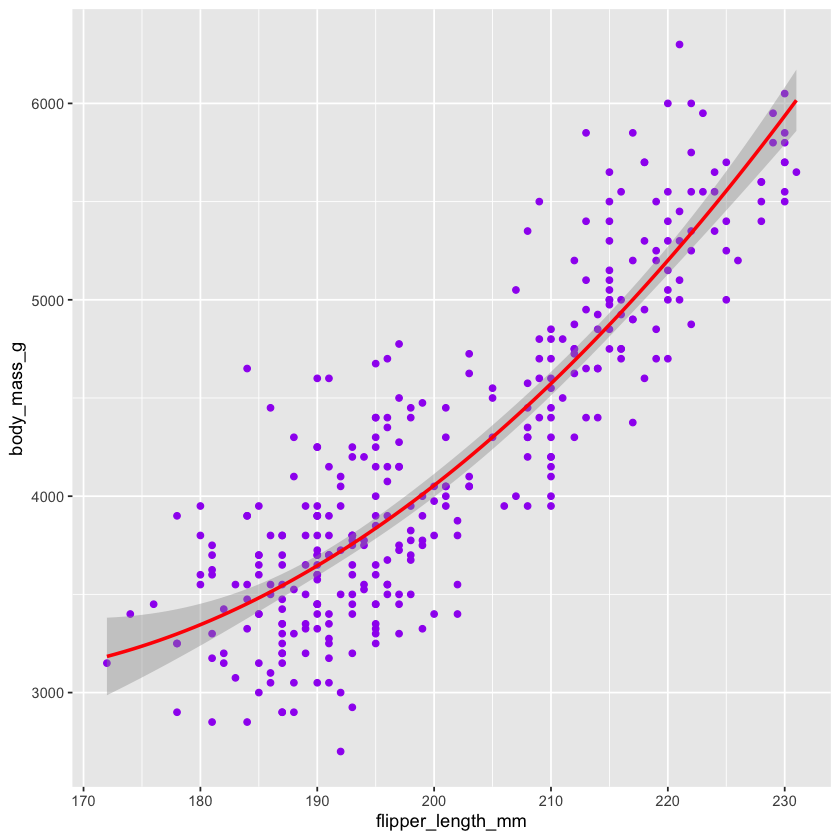

In [59]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point(color="purple") + geom_smooth(method = "lm", formula = y ~ poly(x,2), color="red")

We added a purple color to the points and a red color to the regression line, specifying the color in the `color` argument in the `geom_point` and `geom_smooth` functions.

But we can do better, we can use the `species` variable to color the points.

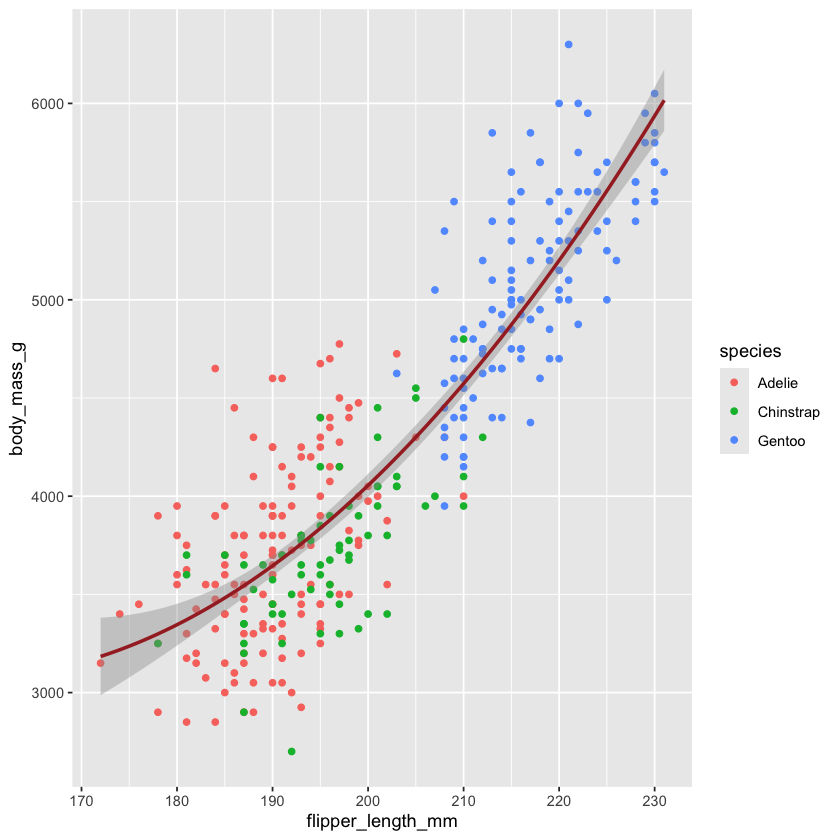

In [68]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point(aes(color=species)) + geom_smooth(method = "lm", formula = y ~ poly(x,2), color="brown")

As you can notice, we also got a legend, with the colors for the species. I changed the regression line color to brown, to make it more visible.

## Add a title and labels

We can add a title to the plot to make it more informative.

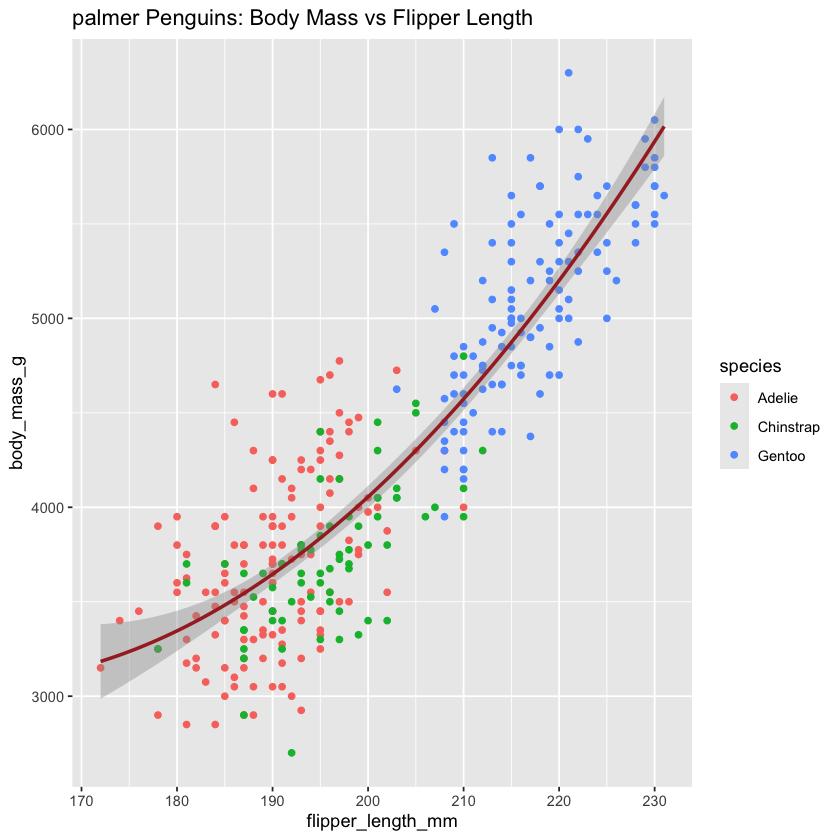

In [ ]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point(aes(color=species)) + geom_smooth(method = "lm", formula = y ~ poly(x,2), color="brown") + labs(title="Palmer Penguins: Body Mass vs Flipper Length")

We can also specify the labels for the axes.

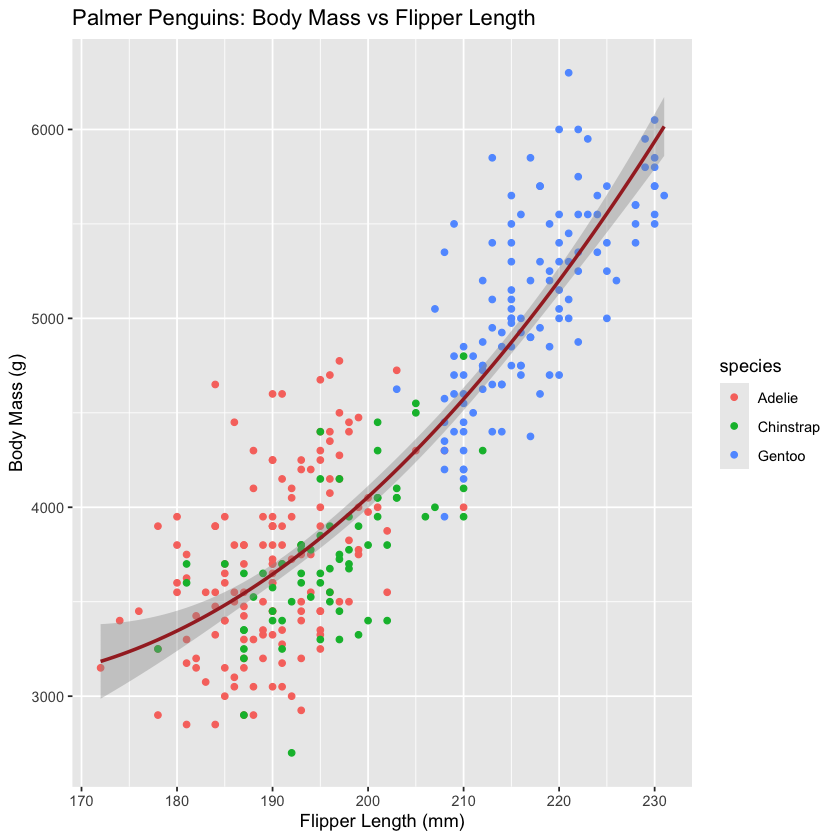

In [72]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point(aes(color=species)) + geom_smooth(method = "lm", formula = y ~ poly(x,2), color="brown") + labs(title="Palmer Penguins: Body Mass vs Flipper Length", x="Flipper Length (mm)", y="Body Mass (g)")

And we can also add a subtitle to the plot.

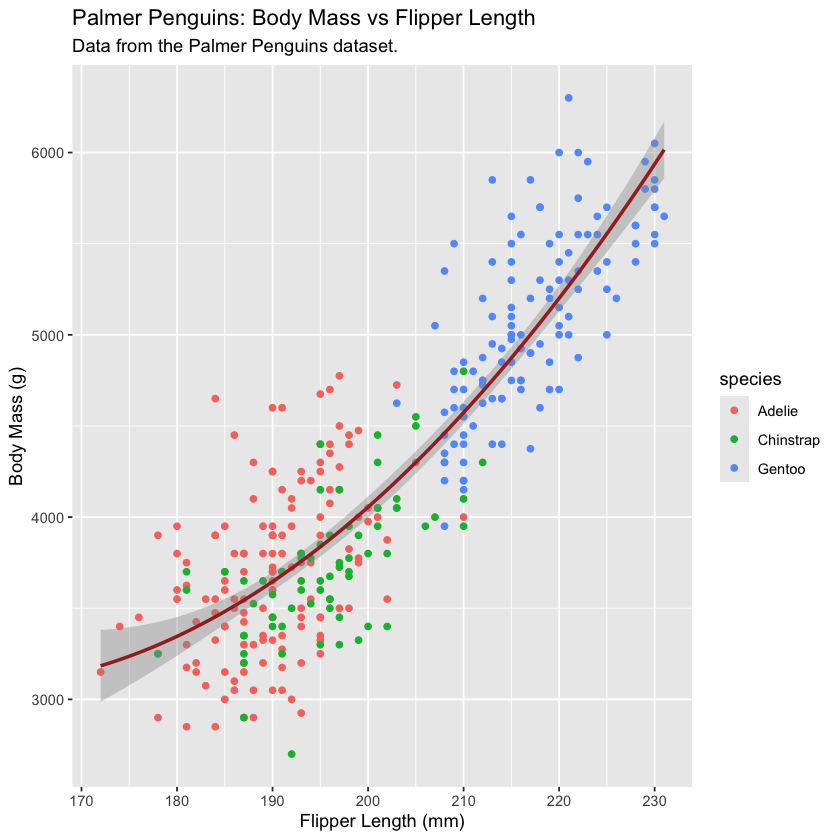

In [75]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point(aes(color=species)) + geom_smooth(method = "lm", formula = y ~ poly(x,2), color="brown") + labs(title="Palmer Penguins: Body Mass vs Flipper Length", x="Flipper Length (mm)", y="Body Mass (g)", subtitle="Data from the Palmer Penguins dataset.")

We can also add a caption to the plot.

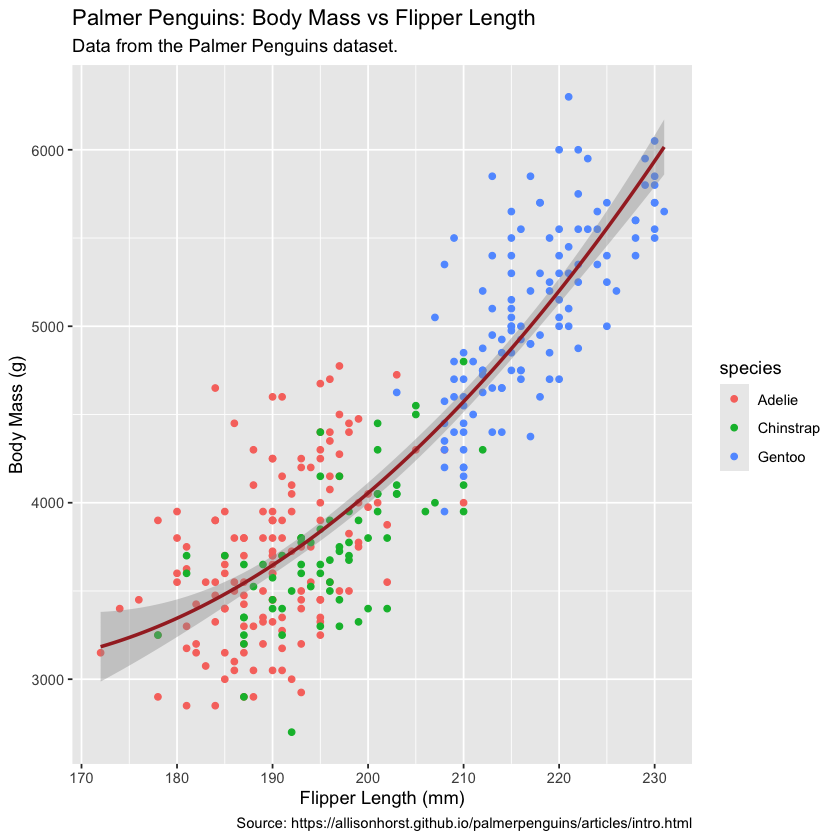

In [76]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point(aes(color=species)) + geom_smooth(method = "lm", formula = y ~ poly(x,2), color="brown") + labs(title="Palmer Penguins: Body Mass vs Flipper Length", x="Flipper Length (mm)", y="Body Mass (g)", subtitle="Data from the Palmer Penguins dataset.", caption="Source: https://allisonhorst.github.io/palmerpenguins/articles/intro.html")

To polish the plot from the gray background, we can use a minimal theme, pretty popular in data visualization.

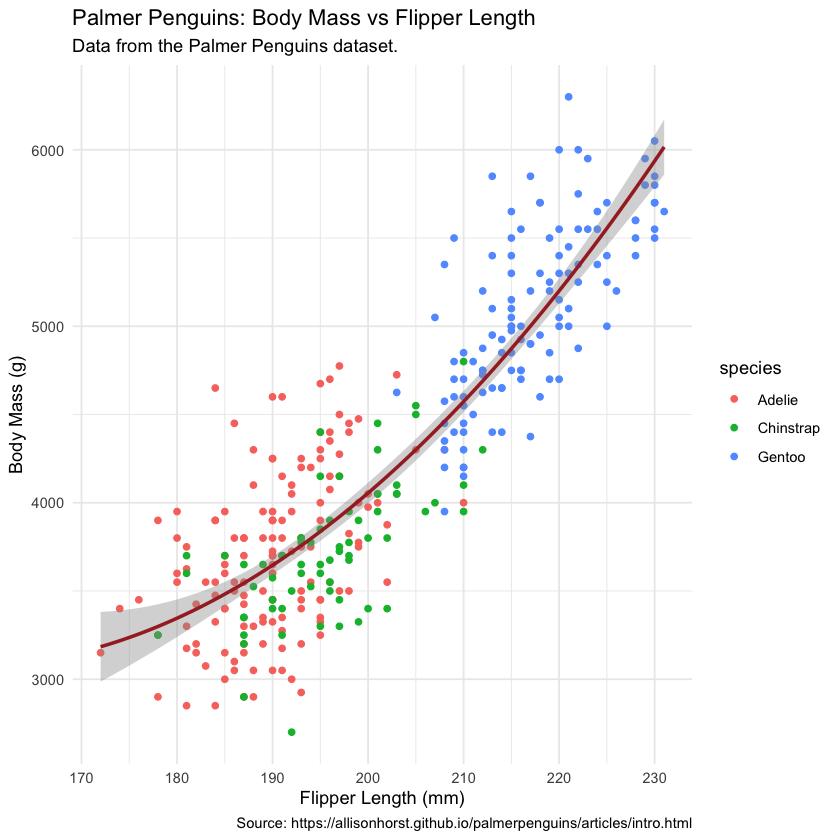

In [77]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point(aes(color=species)) + geom_smooth(method = "lm", formula = y ~ poly(x,2), color="brown") + labs(title="Palmer Penguins: Body Mass vs Flipper Length", x="Flipper Length (mm)", y="Body Mass (g)", subtitle="Data from the Palmer Penguins dataset.", caption="Source: https://allisonhorst.github.io/palmerpenguins/articles/intro.html") + theme_minimal()

## Dra a different plot for each species

The easiest way to do this is to use the `facet_wrap` function.

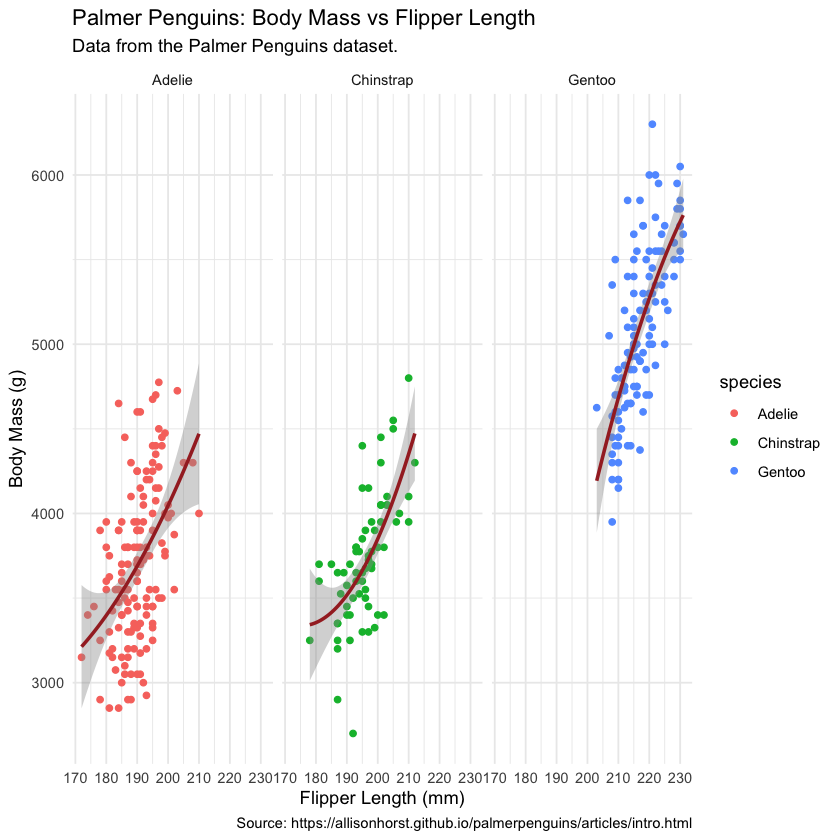

In [78]:
ggplot(data=penguins,aes(x=flipper_length_mm,y=body_mass_g)) + geom_point(aes(color=species)) + geom_smooth(method = "lm", formula = y ~ poly(x,2), color="brown") + labs(title="Palmer Penguins: Body Mass vs Flipper Length", x="Flipper Length (mm)", y="Body Mass (g)", subtitle="Data from the Palmer Penguins dataset.", caption="Source: https://allisonhorst.github.io/palmerpenguins/articles/intro.html") + theme_minimal() + facet_wrap(~species)

Those Gentoo penguins are way heavier than the other two species!

![A comparison between the three penguin species Adelie, Chinstrap and Gentoo](https://www.gabemednick.com/post/penguin/featured_hu23a2ff6767279debab043a6c8f0a6157_878472_720x0_resize_lanczos_2.png)

*Credits to [Gabriel Mednick](https://www.gabemednick.com/post/penguin/)*

That's it! You have just created a scatter plot with R.

If you liked this notebook, you can find more of my work with Data Science [here](https://github.com/matteocervelli/notebooks).